## KNN Classifier ##

##### This classifier is same as orignal sklearn classifier and here i will show you how to make KNN classifier ,which is very simple classifier in sklearn ####

Use *find_nearest_neighbour()* to find nearest neighbour index for givenk value.
Use *knn_predict()* to get predicted nearest neighbour for given k.
Use *make_prediction_grid()* to make grid for xs and ys and 
Use *plot_prediction_grid()* to plot grid structure and predicted value for specific group.

In [1]:
import numpy as np
def distance(p1, p2):
    """ Find the Distance between two point.  """
    return np.sqrt(sum(np.power(p1 - p2, 2)))


In [2]:
import scipy.stats as ss
def majority_vote(votes):
    """
    Return most frequent values in the list
    """
    mode, count = ss.mstats.mode(votes)
    return mode


In [3]:
def find_nearest_neighbour(p, points, k=5):
    """
    Find k nearest neighbour of point p and return their indices.
    Here point p is just some point and points is array.
    """
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]


In [4]:
def knn_predict(p, points, outcomes, k=5):
    """This function helps to predict the classes of given point p at 
       k nearest distance from points array. 
    """
    ind = find_nearest_neighbour(p, points, k)
    return majority_vote(outcomes[ind])


In [5]:
def generate_synth_data(n=50):
    """create two sets of point from normal distribution"""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0,n), np.repeat(1,n)))
    return (points, outcomes)


In [6]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """Classify each point on the prediction grid."""
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    return (xx, yy, prediction_grid)


In [7]:
import matplotlib.pyplot as plt    
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.show()

##### Now i will show you how to use above function using some example #####

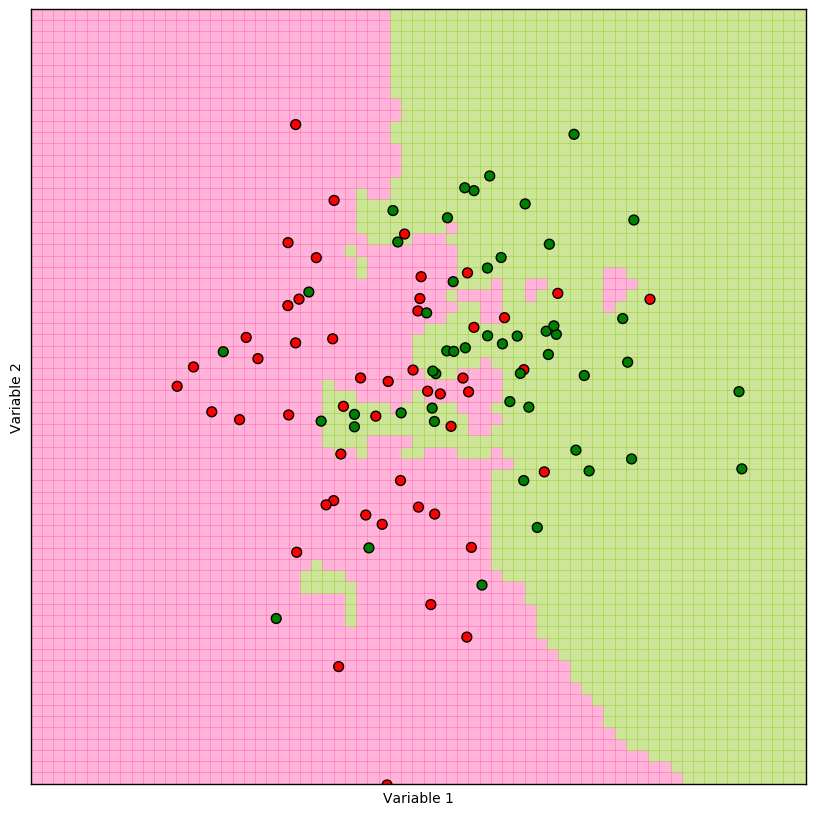

In [8]:
predictors, outcomes = generate_synth_data()       

limits = (-3,4,-3,4); h = 0.1; k = 3; filename = "knn_synth_3.pdf"
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)   

plot_prediction_grid(xx, yy, prediction_grid, filename)


##### Applying KNN Classifier on iris dataset #####

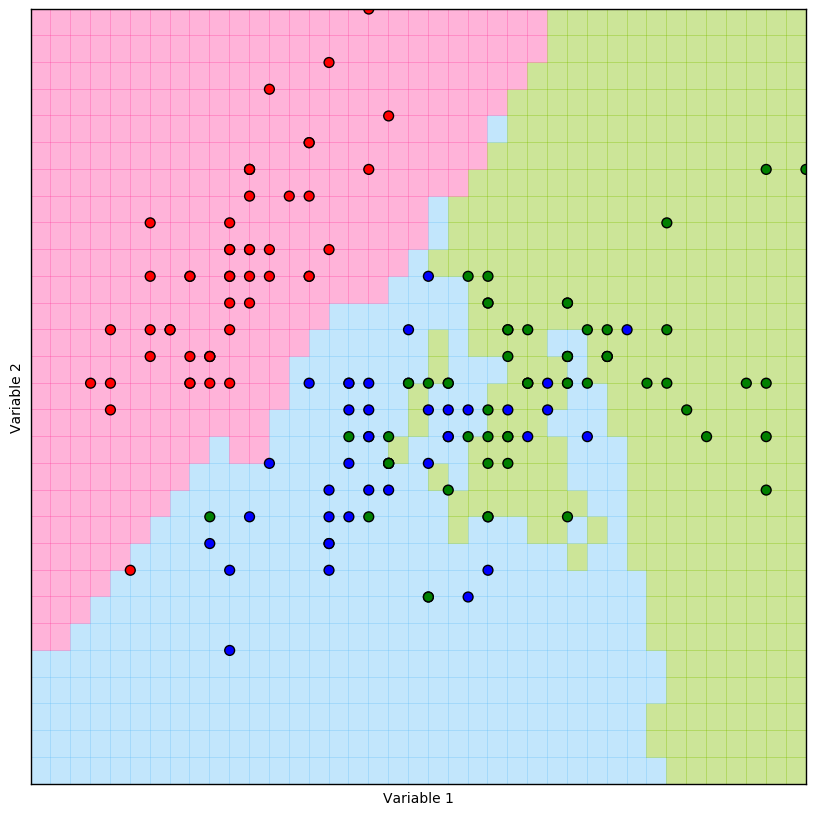

In [9]:
from sklearn import datasets
iris = datasets.load_iris()
predictors = iris.data[:,0:2]
outcomes = iris.target   
k = 5; h = 0.1; filename = "iris_grid.pdf"; limits = (4,8,1.5,4.5)

(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)   

plot_prediction_grid(xx, yy, prediction_grid, filename)
